In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [2]:
df = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
x = StandardScaler().fit_transform(df)
y = load_iris().target

In [6]:
# Instantiate PCA object and set the output dimensions to 2
pca = PCA(n_components=2)

# Use the PCA object to transform the data
principalComponents = pca.fit_transform(x)

In [7]:
principalComponents = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalComponents.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


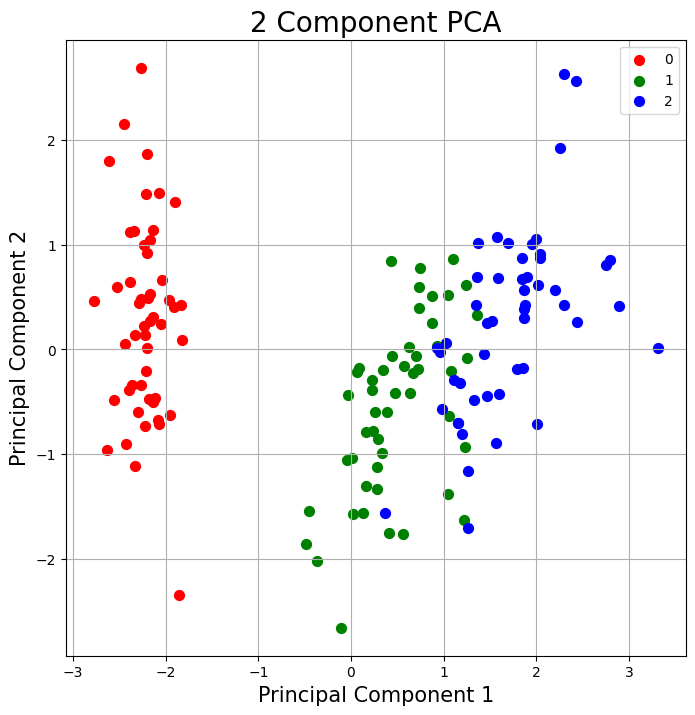

In [8]:
# Create figure and axes for the plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = np.unique(y) # Get all label names
colors = ['red', 'green', 'blue'] # Create a list of colors to assign to each label

# Iterate throguh the data set and color each label with the corresponding color
# Create a scatter plot to visualize the 2 dimensions of the new dataset
for target, color in zip(targets, colors):
  indicesToKeep = y == target
  ax.scatter(principalComponents.loc[indicesToKeep, 'PC1'],
             principalComponents.loc[indicesToKeep, 'PC2'],
             c = color, s = 50)

  ax.legend(targets)
  ax.grid()

In [9]:
# Create kpca instance
kpca = KernelPCA(n_components=2, kernel='rbf')

# Build a pipeline with PCA and SVC
pipeline = Pipeline([("kpca", kpca), ("svc", SVC())])

# Select parameter range for kpca
# Select all values from 0.03 to 0.05 incremeted by 0.001
kpca_params = [{"kpca__gamma": np.arange(0.03, 0.05, 0.001)}]

In [10]:
# Tuning gamma
kpca_tune = GridSearchCV(pipeline, kpca_params, cv=5)
kpca_tune.fit(x,y)
kpca_tune.best_params_

{'kpca__gamma': 0.047000000000000014}

In [11]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.047)
# Use the pca object to transform the data
principalComponents = kpca.fit_transform(x)

In [12]:
principalComponents = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalComponents.head()

,PC1,PC2
0,0.583591,-0.123095
1,0.520770,0.156202
2,0.585235,0.059063
3,0.563369,0.120939
4,0.603853,-0.166604


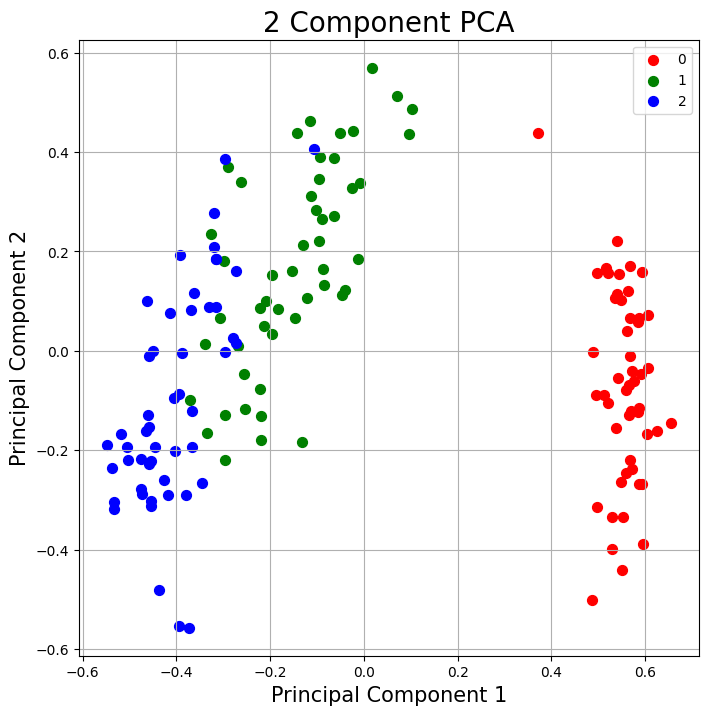

In [13]:
# Create figure and axes for the plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = np.unique(y) # Get all label names
colors = ['red', 'green', 'blue'] # Create a list of colors to assign to each label

# Iterate through the data set and color each label with the corresponding color\
# Create a scatter plot to visualize the 2 dimensions of the new dataset
for target, color in zip(targets, colors):
  indicesToKeep = y == target
  ax.scatter(principalComponents.loc[indicesToKeep, 'PC1'],
             principalComponents.loc[indicesToKeep, 'PC2'],
             c = color, s = 50)

  ax.legend(targets)
  ax.grid()